In [45]:
# Import required libraries
import cv2 as cv
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



In [47]:
# Load Haarcascade Classifier
pretrained = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [49]:
# Step 1: Data Collection for Masked Faces
capture = cv.VideoCapture(0)  # Change to file path if using pre-recorded video
data_mask = []

while True:
    ret, img = capture.read()
    if ret:
        faces = pretrained.detectMultiScale(img)
        for x, y, w, h in faces:
            face = img[y:y+h, x:x+w, :]
            face = cv.resize(face, (50, 50))
            if len(data_mask) < 200:
                data_mask.append(face)
        if len(data_mask) >= 200:
            break
capture.release()
cv.destroyAllWindows()

np.save('mask.npy', data_mask)  # Save data


In [51]:
# Step 2: Data Collection for Non-Masked Faces
capture = cv.VideoCapture(0)  # Change to file path if using pre-recorded video
data_no_mask = []

while True:
    ret, img = capture.read()
    if ret:
        faces = pretrained.detectMultiScale(img)
        for x, y, w, h in faces:
            face = img[y:y+h, x:x+w, :]
            face = cv.resize(face, (50, 50))
            if len(data_no_mask) < 200:
                data_no_mask.append(face)
        if len(data_no_mask) >= 200:
            break
capture.release()
cv.destroyAllWindows()

np.save('no_mask.npy', data_no_mask)  # Save data


In [53]:
# Step 3: Load and Prepare Data
mask = np.load('mask.npy')
no_mask = np.load('no_mask.npy')

mask = mask.reshape(200, 50 * 50 * 3)
no_mask = no_mask.reshape(200, 50 * 50 * 3)

X = np.r_[mask, no_mask]
y = np.r_[np.ones(200), np.zeros(200)]

In [55]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:

# Step 5: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [59]:
# Step 6: Train SVM Classifier
model = SVC()
model.fit(X_train, y_train)

SVC()

In [61]:
# Step 7: Evaluate the Model
accuracy = model.score(X_test, y_test)
y_pred = model.predict(X_test)

In [63]:
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        36
         1.0       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



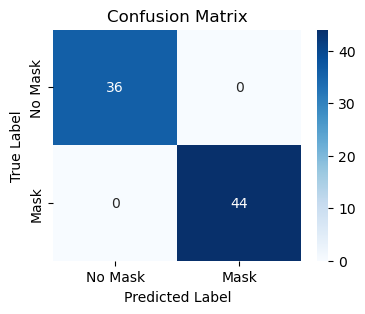

In [65]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', xticklabels=['No Mask', 'Mask'], yticklabels=['No Mask', 'Mask'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Step 8: Real-Time Mask Detection
capture = cv.VideoCapture(0)
names = {0: 'No Mask', 1: 'Mask'}

while True:
    ret, img = capture.read()
    if ret:
        faces = pretrained.detectMultiScale(img)
        for x, y, w, h in faces:
            face = img[y:y+h, x:x+w, :]
            face = cv.resize(face, (50, 50))
            face = face.reshape(1, -1)
            face = pca.transform(face)
            pred = model.predict(face)
            label = names[int(pred)]
            cv.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 2)
            cv.putText(img, label, (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
        cv.imshow('Mask Detection', img)
        if cv.waitKey(2) == 27:  # Press 'Esc' to exit
            break
capture.release()
cv.destroyAllWindows()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10608\1703544858.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = names[int(pred)]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10608\1703544858.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = names[int(pred)]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10608\1703544858.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = names[int(pred)]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1060

In [41]:
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        36
         1.0       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

